In [44]:
#Incidence matrix for K4, opposite edges are ports
NMatK4All = matrix(4, 6,
    [[ 1, 0,  -1,  0,  1,   0],
     [-1,  0,  0, -1,  0,  -1],
     [ 0,  1,  1,  1,  0,   0],
     [ 0, -1,  0,  0, -1,   1]
    ])
#delete the row with the most, all, neg signs to demo directed version better.
NMatK4dRow1 = NMatK4All.delete_rows([1])
#NMatK4dRow3 = NMatK4All.delete_rows([3])
#use Sage's dualization and verify LATER it gives the same Grassmann rep. as ours.
NMatK4Perp  = NMatK4dRow1.right_kernel_matrix()

In [45]:
latex(NMatK4All)

\left(\begin{array}{rrrrrr}
1 & 0 & -1 & 0 & 1 & 0 \\
-1 & 0 & 0 & -1 & 0 & -1 \\
0 & 1 & 1 & 1 & 0 & 0 \\
0 & -1 & 0 & 0 & -1 & 1
\end{array}\right)

In [46]:
NMatK4dRow1

[ 1  0 -1  0  1  0]
[ 0  1  1  1  0  0]
[ 0 -1  0  0 -1  1]

In [47]:
latex(NMatK4dRow1)

\left(\begin{array}{rrrrrr}
1 & 0 & -1 & 0 & 1 & 0 \\
0 & 1 & 1 & 1 & 0 & 0 \\
0 & -1 & 0 & 0 & -1 & 1
\end{array}\right)

In [48]:
NMatK4Perp

[ 1  0  0  0 -1 -1]
[ 0  1  0 -1  0  1]
[ 0  0  1 -1  1  1]

In [49]:
#somewhat arbitrary and simple non-unimodular case, for investigation Tutte POLY extension.

NMatGEN3loops = matrix(3,3+3,
    [[ 1, 0,   0,  3,  0,   0],
     [ 0,  1,  0,  0,  5,   0],
     [ 0,  0,  7,  0,  0,   1]
    ])

NMatGENweird = matrix(3,3+3,
    [[ 1, 0,   0,  11,  1,   0],
     [ 0, 1,  13,   0,  0,   0],
     [ 0, 1,   0,   0,  17,  1]
    ])

NMatGENweird.right_kernel()


Free module of degree 6 and rank 3 over Integer Ring
Echelon basis matrix:
[  1   0   0   0  -1  17]
[  0  13  -1   0   0 -13]
[  0   0   0   1 -11 187]

In [57]:
#random positive integer matrices..

NMatARand = matrix(3,3 + 3,[101-int(random()*50) for i in range(0,18)])
NMatBRand = matrix(3,3 + 3,[101-int(random()*50) for i in range(0,18)])

print(NMatARand)
print("\n",NMatBRand)

print(sage_input(NMatARand))
print(sage_input(NMatBRand))


[ 53  68  70  97  64  87]
[ 54  80  94  76 101  69]
[ 72  80  71  89  72  91]

 [60 76 71 80 54 77]
[74 93 54 78 74 84]
[58 58 87 94 57 71]
matrix(ZZ, [[53, 68, 70, 97, 64, 87], [54, 80, 94, 76, 101, 69], [72, 80, 71, 89, 72, 91]])
matrix(ZZ, [[60, 76, 71, 80, 54, 77], [74, 93, 54, 78, 74, 84], [58, 58, 87, 94, 57, 71]])


In [58]:
#In case I want to repeat what I discover randomly

NMatARandSaved = matrix(ZZ, [[97, 92, 78, 80, 83, 88], [80, 56, 76, 84, 83, 75], [71, 84, 89, 86, 98, 78]])

NMatARandSaved = matrix(ZZ, [[54, 80, 83, 81, 98, 85], [78, 86, 89, 79, 70, 55], [66, 90, 67, 76, 71, 79]])

In [59]:
def removeNegs(M):
    ret=matrix(M.nrows(),M.ncols(), lambda x, y : max(M[x,y],0))
    return(ret)

In [60]:
# For directed graph MTT like cases

NMatK4Pos = removeNegs (NMatK4All)
print(NMatK4Pos,"\n")
NMatK4PosDelRow1=NMatK4Pos.delete_rows([1])
print(NMatK4PosDelRow1,"\n")
print(NMatK4dRow1,"\n")
#print(NMatK4dRow3,"\n")

[1 0 0 0 1 0]
[0 0 0 0 0 0]
[0 1 1 1 0 0]
[0 0 0 0 0 1] 

[1 0 0 0 1 0]
[0 1 1 1 0 0]
[0 0 0 0 0 1] 

[ 1  0 -1  0  1  0]
[ 0  1  1  1  0  0]
[ 0 -1  0  0 -1  1] 



In [61]:
#Set up of the exterior algebra requires a fixed universe

# number of E and P elts in the universe
var('UN,UP')
UN=4; UP=2
UR=3

In [62]:
Crg = PolynomialRing(RationalField(),
                     ['r%s'%i for i in range(1, UN+1)] + ['g%s'%i for i in range(1, UN+1)]
                    + ['U','V','W','Y'])
Crg.inject_variables()


#CrgF=Crg.fraction_field()
#CrgF.inject_variables()
#THIS FAILS WHEN WE TRY TO MULTIPLY AN EXTERIOR ALG ELE BY A POLY. GENERATOR

Ext=\
    ExteriorAlgebra(Crg,\
        ['p%s'%i  for i in range(1, UP+1)]+\
        ['pa%s'%i for i in range(1, UP+1)]+\
        ['pb%s'%i for i in range(1, UP+1)]+\
        ['e%s'%i  for i in range(1, UN+1)])
Ext.inject_variables() 

Rrrs=[Crg.gen(i)    for i in range(0, UN)]
Gees=[Crg.gen(i)    for i in range(UN, 2*UN)]
Pees=[Ext.gen(i)    for i in range(0, UP)]
Paas=[Ext.gen(i)    for i in range(UP, 2*UP)]
Pbes=[Ext.gen(i)    for i in range(2*UP, 3*UP)]
Eees=[Ext.gen(i)    for i in range(3*UP, 3*UP+UN)]

NSeq=Pees+Eees
PEVol=prod(NSeq)
EVol=prod(Eees)

def RofE(e):
    return(Rrrs[Eees.index(e)])
def GofE(e):
    return(Gees[Eees.index(e)])

diagRrrs=diagonal_matrix(Rrrs)
diagGees=diagonal_matrix(Gees)

matII=block_matrix([[matrix(UP)         ,matrix(UP)    ,matrix(UP)   ,matrix(UP,UN)],
                    [identity_matrix(UP),matrix(UP)    ,matrix(UP)   ,matrix(UP,UN)],       
                    [matrix(UP)         ,matrix(UP)    ,matrix(UP)   ,matrix(UP,UN)],
                    [matrix(UN,UP)      ,matrix(UN,UP) ,matrix(UN,UP),diagGees     ]
                   ])
matVV=block_matrix([[matrix(UP)         ,matrix(UP)    ,matrix(UP)   ,matrix(UP,UN)],
                    [matrix(UP)         ,matrix(UP)    ,matrix(UP)   ,matrix(UP,UN)],       
                    [identity_matrix(UP),matrix(UP)    ,matrix(UP)   ,matrix(UP,UN)],
                    [matrix(UN,UP)      ,matrix(UN,UP) ,matrix(UN,UP),diagRrrs     ]
                   ])

II=Ext.lift_module_morphism(matII)
VV=Ext.lift_module_morphism(matVV)


Defining r1, r2, r3, r4, g1, g2, g3, g4, U, V, W, Y
Defining p1, p2, pa1, pa2, pb1, pb2, e1, e2, e3, e4


In [67]:
#Generating an example from the K4 graph
#might be useful for other graphs.

#this block also contains old code for calculating the Ext Tutte fun "by hand"


n=UN
p=UP

var('r cr')

r = 3

cr = n+p-r

#these will be overwritten when they are built from a graph below

Nal =   matrix(Crg,  r,  n+p)
NbePe = matrix(Crg, cr,  n+p)


#
# Supply a graph
#
Graph1MyEdges= [(2, 1, p1),(4, 3, p2),(1, 3, e1), (2, 3, e2), (4, 1, e3),(2, 4, e4)  ]
#HA I can label the edges with Ext generators!

Graph1=DiGraph([[1,2,3,4],Graph1MyEdges])

pos_dict = {
 1: [.33, .25],
 2: [.33, 0],
 3: [.6, .33],
 4: [0.6, -.1]}

myplot=Graph1.plot(edge_labels=True,vertex_labels=True,pos=pos_dict,save_pos=True)
myplot.save("K4.pdf")
myplot

#Graph1.edges()

NalFull=Graph1.incidence_matrix(oriented=True, edges=Graph1MyEdges)
                       
NalFull

temp=[i for i in range(r,Graph1.num_verts())]
Nal=NalFull.delete_rows(temp)
assert((Nal.nrows()==r) & (Nal.ncols()==n+p))
Nal

latex(Nal)

NbePe=Nal.right_kernel().basis_matrix()
NbePe

latex(NbePe)

NalG=   Nal  *diagonal_matrix([1 for i in range(0,p)]+Gees)
NbePeR= NbePe*diagonal_matrix([1 for i in range(0,p)]+Rrrs)

latex(NalG)

NbePeR

latex(NbePeR)

Lal=NalG   * (matrix([Paas+Eees]).transpose());print("Lal:\n",Lal)
Lbe=NbePeR * (matrix([Pbes+Eees]).transpose());print("\nLbe:\n",Lbe)

dictLal=Lal.dict();dictLal

dictLbe=Lbe.dict();dictLbe

ResAl=1
for i in range(0,r):
    ResAl=ResAl*(dictLal.get((i,0)))
print("ResAl\n")
print(ResAl)
ResBe=1
for i in range(0,cr):
    ResBe=ResBe*(dictLbe.get((i,0)))
print("\nResBe\n")
print(ResBe)
Res=ResAl*ResBe

LLL=Res

#print("final result")
#print(Res)
Reslist=Res.list()
print("\n Res list:\n")
print(Reslist)


RESULT=0
for thing in Reslist:
    #print(tuple(range(3*p,3*p+n)))
    #print("\nTry:",thing[0])
    if thing[0][p:p+n]==tuple(range(3*p,3*p+n)):
    #    print(" \n", thing)
        prgens=1
    #    print("\n",thing[0][0:p])
        for i in thing[0][0:p]:
            prgens=prgens*(Ext.gens()[i])
    #    print(" \nMonomial:", prgens)
    #    print("Coef:",thing[1])
        term = thing[1]*prgens
    #     print(" \n", term)
        RESULT = RESULT + term
        
print("\nHERE IT IS:", RESULT)

Lal:
 [ pa1 - g1*e1 + g3*e3]
[-pa1 - g2*e2 - g4*e4]
[ pa2 + g1*e1 + g2*e2]

Lbe:
 [          pb1 - r3*e3 - r4*e4]
[          pb2 - r2*e2 + r4*e4]
[r1*e1 - r2*e2 + r3*e3 + r4*e4]
ResAl

g1*pa1*pa2*e1 + g2*pa1*pa2*e2 - g3*pa1*pa2*e3 + g4*pa1*pa2*e4 - g1*g3*pa1*e1*e3 + g1*g4*pa1*e1*e4 - g2*g3*pa1*e2*e3 + g2*g4*pa1*e2*e4 + g1*g2*pa2*e1*e2 + g1*g4*pa2*e1*e4 + g2*g3*pa2*e2*e3 - g3*g4*pa2*e3*e4 + g1*g2*g3*e1*e2*e3 - g1*g2*g4*e1*e2*e4 - g1*g3*g4*e1*e3*e4 - g2*g3*g4*e2*e3*e4

ResBe

r1*pb1*pb2*e1 - r2*pb1*pb2*e2 + r3*pb1*pb2*e3 + r4*pb1*pb2*e4 + r1*r2*pb1*e1*e2 - r1*r4*pb1*e1*e4 - r2*r3*pb1*e2*e3 - r3*r4*pb1*e3*e4 - r1*r3*pb2*e1*e3 - r1*r4*pb2*e1*e4 + r2*r3*pb2*e2*e3 + r2*r4*pb2*e2*e4 - r1*r2*r3*e1*e2*e3 - r1*r2*r4*e1*e2*e4 - r1*r3*r4*e1*e3*e4 + r2*r3*r4*e2*e3*e4

 Res list:

[((2, 3, 4, 5, 6, 7), -r2*g1 - r1*g2), ((2, 3, 4, 5, 6, 8), r3*g1 + r1*g3), ((2, 3, 4, 5, 6, 9), r4*g1 - r1*g4), ((2, 3, 4, 5, 7, 8), r3*g2 - r2*g3), ((2, 3, 4, 5, 7, 9), r4*g2 + r2*g4), ((2, 3, 4, 5, 8, 9), -r4*g3 - r3*g4

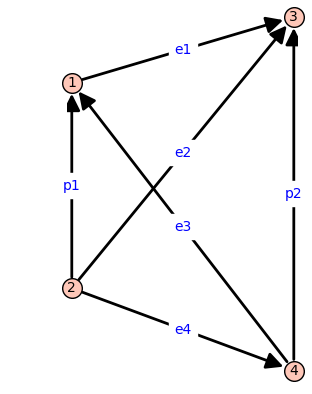

In [68]:
myplot
#do not use show since it is computer

In [13]:
#Exterior Algebra operations only
#Exterior Algebra with ground set operations are defined later.


def contract(X,E):
    #only contract by monomials
    #Is used to implement LvSE and LhSE contraction where the ground set is Palpha+Pbeta+E
    assert (E.length()==1)
    return (X.interior_product(E)*(-1)^(E.degree()*(X.degree()-E.degree())))

def delete(X,e):
    #the subtraction formula only works for vectors.
    assert (e.degree()==1 & e.length()==1)
    return (X - contract(X,e)*e)

def delete_contract(X,e):
    #only contract by monomials
    assert (e.degree()==1 & e.length()==1)
    contr = X.interior_product(e)*(-1)^(e.degree()*(X.degree()-e.degree()))
    dele = X - contr*e
    return (dele, contr)

def perp(VOL,N):
    return (VOL.interior_product(N))

In [14]:
#Exterior algebra elements with ground sequenced ground set
class ExtS:
    def __init__(this, extN, seqS):
        this.extN = extN
        this.seqS = copy(seqS)
        this._set_VOL()      
    
    def contraction(this,e):
        #does only one
        assert (e.length()==1 & e.degree()==1)
        result = this._copy_remove(e)
        result.extN = contract(result.extN,e)
        return (result)
    def deletion(this,e):
        #does only one
        assert (e.length()==1 & e.degree()==1)  
        result = this._copy_remove(e)
        result.extN = delete(result.extN,e)
        return (result)
    def perp(this):
        result=this._copy()
        result.extN = perp(this.VOL, this.extN)
        return (result)
    
    def printme(this):
        print("element:",this.extN)
        print("\nList Form:",this.extN.list())
        print("set orientation:",this.seqS)
        print("Volume:",this.VOL)
        
    def _set_VOL(this):
        acc = 1
        for v in this.seqS:
            acc = acc*v
        this.VOL = acc
    def _copy(this):
        return ExtS(this.extN, this.seqS)    
    def _copy_remove(this,e):
        result = this._copy()
        result.seqS.remove(e)
        result._set_VOL()
        return(result)



In [15]:
def ExtFromMatrix(NMat):
    ExtCol=NMat*(matrix([NSeq]).transpose())
    ExtRes=1
    for i in range(0,ExtCol.nrows()):
        ExtRes=ExtRes*ExtCol[i,0]
    return ExtRes

def ExtSFromExt(extN):
    seq=list(extN.parent().gens()[0:UP])+list(extN.parent().gens()[3*UP:])
    return (ExtS(extN, seq))

def ExtSFromMatrix(Matr):
    extN=ExtFromMatrix(Matr)
    return (ExtSFromExt(extN))


In [16]:
def LvS(ExtStop,ExtSbot):
    assert ((ExtStop.extN.parent()==ExtSbot.extN.parent()) & 
            (ExtStop.seqS==ExtSbot.seqS))
    newSeq=list(ExtStop.extN.parent().gens()[UP:3*UP])+ExtStop.seqS[UP:]
    newExt=II(ExtStop.extN)*VV(ExtSbot.extN)
    return ExtS(newExt,newSeq)
def LvSE(ExtStop,ExtSbot):
    LvSret=LvS(ExtStop,ExtSbot)
    ESeq=list(ExtStop.seqS[UP:])
    PaPbSeq=list(ExtStop.extN.parent().gens()[UP:3*UP])
    EE=1
    for v in ESeq:
        EE=EE*v
    newExt=contract(LvSret.extN,EE)
    return( ExtS(newExt,PaPbSeq))
def LhS(Extleft,Extright):
    return LvS(Extleft,Extright.perp())
def LhSE(Extleft,Extright):
    return LvSE(Extleft,Extright.perp())

In [17]:
def nstr(n):
    st=""
    for l in ["%s"%i for i in range(1,n+1)]:
        st=st+l
    return st


class Tree():
    autopick = True
    debug = False
    def __init__(self,seq,Nalpha,Nbeta,nameAlpha="NAlpha",nameBeta="NBeta",parent=None):
        self.Nalpha=Nalpha
        self.Nbeta =Nbeta
        self.nameAlpha=nameAlpha
        self.nameBeta=nameBeta
        self.seq = seq
        self.parent = parent
        if not Tree.autopick or Tree.debug:
            print("\nWorking on:")
            print(nameAlpha+":")
            self.Nalpha.printme()
            print(nameBeta+":")
            self.Nbeta.printme()
        if len(seq) != 0:
            if len(seq) == 1:
                self.e = seq[0]
            else:
                if Tree.autopick:
                    self.e = seq[0]
                else:
                    print("\n",seq)
                    self.e = eval(input("Pick one:"))
            #print(self.e)
            nseq=copy(seq)
            nseq.remove(self.e)
            if Tree.debug: print("Make contr subtree:") 
            estr=self.e.__repr__() 
            self.contrchild=Tree(nseq,self.Nalpha.contraction(self.e),self.Nbeta.contraction(self.e),
                                 self.nameAlpha+"/"+estr,self.nameBeta+"/"+estr, self)
            if Tree.debug: print("\nMake delet subtree:")
            self.deletchild=Tree(nseq,Nalpha.deletion(self.e),Nbeta.deletion(self.e),
                                 self.nameAlpha+"\\"+estr, self.nameBeta+"\\"+estr, self)
            self.TF=GofE(self.e)*self.contrchild.TF+RofE(self.e)*self.deletchild.TF
        else:
            self.contrchild = None
            self.deletchild = None
            if Tree.debug: self.Nalpha.printme()
            if Tree.debug: self.Nbeta.printme()
            self.TF=II(self.Nalpha.extN)*VV(perp(self.Nbeta.VOL,self.Nbeta.extN))
    
    def printnode(self):
        print(self.nameAlpha)
        self.Nalpha.printme()
        print(self.nameBeta)
        self.Nbeta.printme()
        print(self.seq)
        if self.contrchild:            
            print(self.contrchild.nameAlpha,self.contrchild.nameBeta)
        else:
            print("No contraction child.")
        if self.deletchild:
            print(self.deletchild.nameAlpha,self.deletchild.nameBeta)
        else:
            print("No contraction child.")
        print(self.TF)

    def printme(self,depth=0):
        print('\n'+(nstr(depth))+"Node:",self.seq)
        print(('--'*depth)+self.nameAlpha)
        self.Nalpha.printme()
        print(('--'*depth)+self.nameBeta)
        self.Nbeta.printme()
        if(self.contrchild):
            self.contrchild.printme(depth+1)
        if(self.deletchild):
            self.deletchild.printme(depth+1)
            
        

In [18]:


class TreeUVWY():
    autopick = True
    debug = False
    def __init__(self,seq,Nalpha,Nbeta,
                 nameAlpha="NAlpha",nameBeta="NBeta",parent=None):

        self.Nalpha=Nalpha 
        self.Nbeta =Nbeta
        self.nameAlpha=nameAlpha
        self.nameBeta=nameBeta
        self.seq = seq
        self.parent = parent
        if (not TreeUVWY.autopick) or TreeUVWY.debug:
            print("\nWorking on:")
            print(nameAlpha+":")
            self.Nalpha.printme()
            print(nameBeta+":")
            self.Nbeta.printme()
        
        self.leftchild = None
        self.rightchild = None
        
        if (self.Nalpha.extN == 0 and self.Nbeta.extN == 0):
            if TreeUVWY.debug: self.Nalpha.printme()
            if TreeUVWY.debug: self.Nbeta.printme()
            self.TF=0
            return
        if len(seq) != 0:
            if len(seq) == 1:
                self.e = seq[0]
            else:
                if TreeUVWY.autopick:
                    self.e = seq[0]
                else:
                    print("\n",seq)
                    self.e = eval(input("Pick one:"))
            #print(self.e)
            nseq=copy(seq)
            nseq.remove(self.e)
            estr=self.e.__repr__()
            CA=Nalpha.contraction(self.e)
            CB=self.Nbeta.contraction(self.e)
            DA=Nalpha.deletion(self.e)
            DB=Nbeta.deletion(self.e)
            
            Lcoef=0
            Rcoef=0
            
            if (CA.extN != 0 and CB.extN != 0):
                self.leftchild=TreeUVWY(nseq, CA, CB, self.nameAlpha+"/"+estr,self.nameBeta+"/"+estr, self)
                Lcoef=GofE(self.e)
            if (CA.extN != 0 and CB.extN == 0):
                self.leftchild=TreeUVWY(nseq, CA, DB, self.nameAlpha+"/"+estr,self.nameBeta+"\\"+estr, self)
                Lcoef=V*GofE(self.e)
            if (CA.extN == 0 and CB.extN != 0):
                self.leftchild=TreeUVWY(nseq, DA, CB, self.nameAlpha+"\\"+estr,self.nameBeta+"/"+estr, self)
                Lcoef=U*GofE(self.e)
            if (CA.extN == 0 and CB.extN == 0):
                self.leftchild=TreeUVWY(nseq, DA, DB, self.nameAlpha+"\\"+estr,self.nameBeta+"\\"+estr, self)
                Lcoef=U*V*GofE(self.e)
                
            if (DA.extN != 0 and DB.extN != 0):
                self.rightchild=TreeUVWY(nseq, DA, DB, self.nameAlpha+"\\"+estr,self.nameBeta+"\\"+estr,self)
                Rcoef=RofE(self.e)
            if (DA.extN != 0 and DB.extN == 0):
                self.rightchild=TreeUVWY(nseq, DA, CB, self.nameAlpha+"\\"+estr,self.nameBeta+"/"+estr,self)
                Rcoef=Y*RofE(self.e)
            if (DA.extN == 0 and DB.extN != 0):
                self.rightchild=TreeUVWY(nseq, CA, DB, self.nameAlpha+"/"+estr,self.nameBeta+"\\"+estr,self)
                Rcoef=W*RofE(self.e)
            if (DA.extN == 0 and DB.extN == 0):
                self.rightchild=TreeUVWY(nseq, CA, CB, self.nameAlpha+"/"+estr,self.nameBeta+"/"+estr,self)
                Rcoef=W*Y*RofE(self.e)
            
            self.TF=Lcoef*self.leftchild.TF+Rcoef*self.rightchild.TF
        else:
            self.contrchild = None
            self.deletchild = None
            if Tree.debug: self.Nalpha.printme()
            if Tree.debug: self.Nbeta.printme()
            self.TF=II(self.Nalpha.extN)*VV(perp(self.Nbeta.VOL,self.Nbeta.extN))
    
    def printnode(self):
        print(self.nameAlpha)
        self.Nalpha.printme()
        print(self.nameBeta)
        self.Nbeta.printme()
        print(self.seq)
        
        print("\n",self.TF.list())
        print("\n",self.TF)
        print("\n")
        
        if self.leftchild:            
            print(self.leftchild.nameAlpha,self.leftchild.nameBeta)
        else:
            print("No contraction child.")
        if self.rightchild:
            print(self.rightchild.nameAlpha,self.rightchild.nameBeta)
        else:
            print("No contraction child.")
        print(self.TF)

    def printme(self,depth=0):
        print('\n'+(nstr(depth))+"Node:",self.seq)
        print(('--'*depth)+self.nameAlpha)
        self.Nalpha.printme()
        print(('--'*depth)+self.nameBeta)
        self.Nbeta.printme()
        
        print("\n",self.TF.list())
        print("\n",self.TF)
        print("\n")
        
        if(self.leftchild):
            self.leftchild.printme(depth+1)
        if(self.rightchild):
            self.rightchild.printme(depth+1)
            
        

In [19]:
def TestDeleContIdentity(ExtSNalpha,ExtSNbeta,e):
    start=LhSE(ExtSNalpha,ExtSNbeta)
    contr_alpha=ExtSNalpha.contraction(e)
    contr_beta =ExtSNbeta.contraction(e)
    delet_alpha=ExtSNalpha.deletion(e)
    delet_beta =ExtSNbeta.deletion(e)
    contrLE    =LhSE(contr_alpha,contr_beta)
    deletLE    =LhSE(delet_alpha,delet_beta)
    contrExt   =contrLE.extN
    deletExt   =deletLE.extN
    i=ExtSNalpha.seqS.index(e)-UP
    ge=Gees[i]
    re=Rrrs[i]
    for a in start.extN.list():
        print(a)
    print()
    for a in (ge*contrExt).list():
        print(a)
    print()
    for a in (re*deletExt).list():
        print(a)
    
    print("\n",start.extN==ge*contrExt+re*deletExt)

In [20]:
print(NMatK4All,"\n")
print(NMatK4dRow1,"\n")

EAMTT=ExtSFromMatrix(NMatK4dRow1)
EAMTT.printme()
print("\n")

MTTAns=LhSE(EAMTT,EAMTT)
MTTAns.printme()
MTTAns.extN.list()

[ 1  0 -1  0  1  0]
[-1  0  0 -1  0 -1]
[ 0  1  1  1  0  0]
[ 0 -1  0  0 -1  1] 

[ 1  0 -1  0  1  0]
[ 0  1  1  1  0  0]
[ 0 -1  0  0 -1  1] 

element: p1*p2*e1 + p1*p2*e2 - p1*p2*e3 + p1*p2*e4 - p1*e1*e3 + p1*e1*e4 - p1*e2*e3 + p1*e2*e4 + p2*e1*e2 + p2*e1*e4 + p2*e2*e3 - p2*e3*e4 + e1*e2*e3 - e1*e2*e4 - e1*e3*e4 - e2*e3*e4

List Form: [((0, 1, 6), 1), ((0, 1, 7), 1), ((0, 1, 8), -1), ((0, 1, 9), 1), ((0, 6, 8), -1), ((0, 6, 9), 1), ((0, 7, 8), -1), ((0, 7, 9), 1), ((1, 6, 7), 1), ((1, 6, 9), 1), ((1, 7, 8), 1), ((1, 8, 9), -1), ((6, 7, 8), 1), ((6, 7, 9), -1), ((6, 8, 9), -1), ((7, 8, 9), -1)]
set orientation: [p1, p2, e1, e2, e3, e4]
Volume: p1*p2*e1*e2*e3*e4


element: (r2*r3*r4*g1 + r1*r3*r4*g2 + r1*r2*r4*g3 + r1*r2*r3*g4)*pa1*pa2 + (r1*r4*g2*g3 - r2*r3*g1*g4)*pa1*pb1 + (r2*r4*g1*g3 + r1*r4*g2*g3 + r2*r3*g1*g4 + r1*r3*g2*g4)*pa1*pb2 + (-r3*r4*g1*g2 - r1*r4*g2*g3 - r2*r3*g1*g4 - r1*r2*g3*g4)*pa2*pb1 + (-r1*r4*g2*g3 + r2*r3*g1*g4)*pa2*pb2 + (r4*g1*g2*g3 + r3*g1*g2*g4 + r2*g1*g3*g4 +

[((2, 3), r2*r3*r4*g1 + r1*r3*r4*g2 + r1*r2*r4*g3 + r1*r2*r3*g4),
 ((2, 4), r1*r4*g2*g3 - r2*r3*g1*g4),
 ((2, 5), r2*r4*g1*g3 + r1*r4*g2*g3 + r2*r3*g1*g4 + r1*r3*g2*g4),
 ((3, 4), -r3*r4*g1*g2 - r1*r4*g2*g3 - r2*r3*g1*g4 - r1*r2*g3*g4),
 ((3, 5), -r1*r4*g2*g3 + r2*r3*g1*g4),
 ((4, 5), r4*g1*g2*g3 + r3*g1*g2*g4 + r2*g1*g3*g4 + r1*g2*g3*g4)]

In [21]:
print(NMatK4Pos,"\n")
print(NMatK4PosDelRow1,"\n")
print(NMatK4dRow1,"\n")
#print(NMatK4dRow3,"\n")



[1 0 0 0 1 0]
[0 0 0 0 0 0]
[0 1 1 1 0 0]
[0 0 0 0 0 1] 

[1 0 0 0 1 0]
[0 1 1 1 0 0]
[0 0 0 0 0 1] 

[ 1  0 -1  0  1  0]
[ 0  1  1  1  0  0]
[ 0 -1  0  0 -1  1] 



In [41]:
EADMTT=ExtSFromMatrix(NMatK4dRow1)
print("EADMTT----")
EADMTT.printme()
print("II(EADMTT)---")
IIret=II(EADMTT.extN)
print(II(EADMTT.extN))
print("---")
EBDMTT=ExtSFromMatrix(NMatK4PosDelRow1)
EBDMTT.printme()
print("---")
EBDMTTperp=EBDMTT.perp()
print("EBDMTTperp---")
EBDMTTperp.printme()
print("VV(EBDMTTperp)----")
VVret=VV(EBDMTTperp.extN)
print(VV(EBDMTTperp.extN))


DMTTAns=LhSE(EADMTT,EBDMTT)
print("ANSWER FROM LhSE---")
DMTTAns.printme()
print("---------ANSWER FROM LhSE")
print("manual product----")
manualproduct=IIret*VVret
print(manualproduct)
print("ANSWER DONE MANUALLY--------")
print(contract(manualproduct,e1*e2*e3*e4))
contrman=contract(manualproduct,e1*e2*e3*e4)
print()


DMTTAns.extN==contrman



EADMTT----
element: p1*p2*e1 + p1*p2*e2 - p1*p2*e3 + p1*p2*e4 - p1*e1*e3 + p1*e1*e4 - p1*e2*e3 + p1*e2*e4 + p2*e1*e2 + p2*e1*e4 + p2*e2*e3 - p2*e3*e4 + e1*e2*e3 - e1*e2*e4 - e1*e3*e4 - e2*e3*e4

List Form: [((0, 1, 6), 1), ((0, 1, 7), 1), ((0, 1, 8), -1), ((0, 1, 9), 1), ((0, 6, 8), -1), ((0, 6, 9), 1), ((0, 7, 8), -1), ((0, 7, 9), 1), ((1, 6, 7), 1), ((1, 6, 9), 1), ((1, 7, 8), 1), ((1, 8, 9), -1), ((6, 7, 8), 1), ((6, 7, 9), -1), ((6, 8, 9), -1), ((7, 8, 9), -1)]
set orientation: [p1, p2, e1, e2, e3, e4]
Volume: p1*p2*e1*e2*e3*e4
II(EADMTT)---
g1*pa1*pa2*e1 + g2*pa1*pa2*e2 - g3*pa1*pa2*e3 + g4*pa1*pa2*e4 - g1*g3*pa1*e1*e3 + g1*g4*pa1*e1*e4 - g2*g3*pa1*e2*e3 + g2*g4*pa1*e2*e4 + g1*g2*pa2*e1*e2 + g1*g4*pa2*e1*e4 + g2*g3*pa2*e2*e3 - g3*g4*pa2*e3*e4 + g1*g2*g3*e1*e2*e3 - g1*g2*g4*e1*e2*e4 - g1*g3*g4*e1*e3*e4 - g2*g3*g4*e2*e3*e4
---
element: p1*p2*e4 + p1*e1*e4 + p1*e2*e4 - p2*e3*e4 - e1*e3*e4 - e2*e3*e4

List Form: [((0, 1, 9), 1), ((0, 6, 9), 1), ((0, 7, 9), 1), ((1, 8, 9), -1), ((6, 8,

True

In [43]:
#
# I calculated LhSE(EADMTT,EBDMTT)
# with EBDDT gotten by my dualization of the EADMTT extensor, 
#but this does not give a matrix for EBDMTT I could publish.
# So, I tried the dual computed by Sage's right_kernel_matrix
#and verified it give the same result.
#
#  I could have had it compute the extensor of the product of the
# rows of the right_kernel_matrix result and compare it to 
# my dual of EADMTT, but I was too lazy to dredge up the row product
# calculation again.
#


NMatK4PosDelRow1KERNAL=NMatK4PosDelRow1.right_kernel_matrix()
EBDMTTKERNAL=ExtSFromMatrix(NMatK4PosDelRow1KERNAL)
DMTTAnsFromKernal=LvSE(EADMTT,EBDMTTKERNAL)
DMTTAnsFromKernal.printme()
print()
DMTTAns.printme()

DMTTAns.extN == DMTTAnsFromKernal.extN

element: r1*r2*r3*g4*pa1*pa2 + (r2*r3*g1*g4 + r1*r3*g2*g4)*pa1*pb2 - r1*r2*g3*g4*pa2*pb1 + r2*r3*g1*g4*pa2*pb2 + (r2*g1*g3*g4 + r1*g2*g3*g4)*pb1*pb2

List Form: [((2, 3), r1*r2*r3*g4), ((2, 5), r2*r3*g1*g4 + r1*r3*g2*g4), ((3, 4), -r1*r2*g3*g4), ((3, 5), r2*r3*g1*g4), ((4, 5), r2*g1*g3*g4 + r1*g2*g3*g4)]
set orientation: [pa1, pa2, pb1, pb2]
Volume: pa1*pa2*pb1*pb2

element: r1*r2*r3*g4*pa1*pa2 + (r2*r3*g1*g4 + r1*r3*g2*g4)*pa1*pb2 - r1*r2*g3*g4*pa2*pb1 + r2*r3*g1*g4*pa2*pb2 + (r2*g1*g3*g4 + r1*g2*g3*g4)*pb1*pb2

List Form: [((2, 3), r1*r2*r3*g4), ((2, 5), r2*r3*g1*g4 + r1*r3*g2*g4), ((3, 4), -r1*r2*g3*g4), ((3, 5), r2*r3*g1*g4), ((4, 5), r2*g1*g3*g4 + r1*g2*g3*g4)]
set orientation: [pa1, pa2, pb1, pb2]
Volume: pa1*pa2*pb1*pb2


True

In [24]:
print(NMatK4PosDelRow1KERNAL)
latex(NMatK4PosDelRow1KERNAL)

[ 1  0  0  0 -1  0]
[ 0  1  0 -1  0  0]
[ 0  0  1 -1  0  0]


\left(\begin{array}{rrrrrr}
1 & 0 & 0 & 0 & -1 & 0 \\
0 & 1 & 0 & -1 & 0 & 0 \\
0 & 0 & 1 & -1 & 0 & 0
\end{array}\right)

In [25]:
#
# Calculate the terms of the MTT version that are missing in the DMTT version
#

MTTAns.printme()
print()
DMTTAns.printme()
print()
MTTAns.extN - DMTTAns.extN

element: (r2*r3*r4*g1 + r1*r3*r4*g2 + r1*r2*r4*g3 + r1*r2*r3*g4)*pa1*pa2 + (r1*r4*g2*g3 - r2*r3*g1*g4)*pa1*pb1 + (r2*r4*g1*g3 + r1*r4*g2*g3 + r2*r3*g1*g4 + r1*r3*g2*g4)*pa1*pb2 + (-r3*r4*g1*g2 - r1*r4*g2*g3 - r2*r3*g1*g4 - r1*r2*g3*g4)*pa2*pb1 + (-r1*r4*g2*g3 + r2*r3*g1*g4)*pa2*pb2 + (r4*g1*g2*g3 + r3*g1*g2*g4 + r2*g1*g3*g4 + r1*g2*g3*g4)*pb1*pb2

List Form: [((2, 3), r2*r3*r4*g1 + r1*r3*r4*g2 + r1*r2*r4*g3 + r1*r2*r3*g4), ((2, 4), r1*r4*g2*g3 - r2*r3*g1*g4), ((2, 5), r2*r4*g1*g3 + r1*r4*g2*g3 + r2*r3*g1*g4 + r1*r3*g2*g4), ((3, 4), -r3*r4*g1*g2 - r1*r4*g2*g3 - r2*r3*g1*g4 - r1*r2*g3*g4), ((3, 5), -r1*r4*g2*g3 + r2*r3*g1*g4), ((4, 5), r4*g1*g2*g3 + r3*g1*g2*g4 + r2*g1*g3*g4 + r1*g2*g3*g4)]
set orientation: [pa1, pa2, pb1, pb2]
Volume: pa1*pa2*pb1*pb2

element: r1*r2*r3*g4*pa1*pa2 + (r2*r3*g1*g4 + r1*r3*g2*g4)*pa1*pb2 - r1*r2*g3*g4*pa2*pb1 + r2*r3*g1*g4*pa2*pb2 + (r2*g1*g3*g4 + r1*g2*g3*g4)*pb1*pb2

List Form: [((2, 3), r1*r2*r3*g4), ((2, 5), r2*r3*g1*g4 + r1*r3*g2*g4), ((3, 4), -r1*r2*g

(r2*r3*r4*g1 + r1*r3*r4*g2 + r1*r2*r4*g3)*pa1*pa2 + (r1*r4*g2*g3 - r2*r3*g1*g4)*pa1*pb1 + (r2*r4*g1*g3 + r1*r4*g2*g3)*pa1*pb2 + (-r3*r4*g1*g2 - r1*r4*g2*g3 - r2*r3*g1*g4)*pa2*pb1 - r1*r4*g2*g3*pa2*pb2 + (r4*g1*g2*g3 + r3*g1*g2*g4)*pb1*pb2

In [26]:
latex(DMTTAns.extN)

r_{1} r_{2} r_{3} g_{4}  \mathit{pa}_{1} \wedge \mathit{pa}_{2} + \left( r_{2} r_{3} g_{1} g_{4} + r_{1} r_{3} g_{2} g_{4} \right)  \mathit{pa}_{1} \wedge \mathit{pb}_{2} - r_{1} r_{2} g_{3} g_{4}  \mathit{pa}_{2} \wedge \mathit{pb}_{1} + r_{2} r_{3} g_{1} g_{4}  \mathit{pa}_{2} \wedge \mathit{pb}_{2} + \left( r_{2} g_{1} g_{3} g_{4} + r_{1} g_{2} g_{3} g_{4} \right)  \mathit{pb}_{1} \wedge \mathit{pb}_{2}

In [27]:
NMatK4dRow1

[ 1  0 -1  0  1  0]
[ 0  1  1  1  0  0]
[ 0 -1  0  0 -1  1]

In [28]:
NMatK4Perp

[ 1  0  0  0 -1 -1]
[ 0  1  0 -1  0  1]
[ 0  0  1 -1  1  1]

In [29]:
latex(NMatK4dRow1)

\left(\begin{array}{rrrrrr}
1 & 0 & -1 & 0 & 1 & 0 \\
0 & 1 & 1 & 1 & 0 & 0 \\
0 & -1 & 0 & 0 & -1 & 1
\end{array}\right)

In [30]:
latex(NMatK4Perp)

\left(\begin{array}{rrrrrr}
1 & 0 & 0 & 0 & -1 & -1 \\
0 & 1 & 0 & -1 & 0 & 1 \\
0 & 0 & 1 & -1 & 1 & 1
\end{array}\right)

In [31]:
EK4dRow1=ExtSFromMatrix(NMatK4dRow1)

In [32]:
EK4dRow1.printme()

element: p1*p2*e1 + p1*p2*e2 - p1*p2*e3 + p1*p2*e4 - p1*e1*e3 + p1*e1*e4 - p1*e2*e3 + p1*e2*e4 + p2*e1*e2 + p2*e1*e4 + p2*e2*e3 - p2*e3*e4 + e1*e2*e3 - e1*e2*e4 - e1*e3*e4 - e2*e3*e4

List Form: [((0, 1, 6), 1), ((0, 1, 7), 1), ((0, 1, 8), -1), ((0, 1, 9), 1), ((0, 6, 8), -1), ((0, 6, 9), 1), ((0, 7, 8), -1), ((0, 7, 9), 1), ((1, 6, 7), 1), ((1, 6, 9), 1), ((1, 7, 8), 1), ((1, 8, 9), -1), ((6, 7, 8), 1), ((6, 7, 9), -1), ((6, 8, 9), -1), ((7, 8, 9), -1)]
set orientation: [p1, p2, e1, e2, e3, e4]
Volume: p1*p2*e1*e2*e3*e4


In [33]:
EK4Perp=ExtSFromMatrix(NMatK4Perp)
EK4Perp.printme()

element: p1*p2*e1 - p1*p2*e2 + p1*p2*e3 + p1*p2*e4 + p1*e1*e2 - p1*e1*e4 - p1*e2*e3 - p1*e3*e4 - p2*e1*e3 - p2*e1*e4 + p2*e2*e3 + p2*e2*e4 - e1*e2*e3 - e1*e2*e4 - e1*e3*e4 + e2*e3*e4

List Form: [((0, 1, 6), 1), ((0, 1, 7), -1), ((0, 1, 8), 1), ((0, 1, 9), 1), ((0, 6, 7), 1), ((0, 6, 9), -1), ((0, 7, 8), -1), ((0, 8, 9), -1), ((1, 6, 8), -1), ((1, 6, 9), -1), ((1, 7, 8), 1), ((1, 7, 9), 1), ((6, 7, 8), -1), ((6, 7, 9), -1), ((6, 8, 9), -1), ((7, 8, 9), 1)]
set orientation: [p1, p2, e1, e2, e3, e4]
Volume: p1*p2*e1*e2*e3*e4


In [34]:
LEK4dRow3OverLK4Perp=LvSE(EK4dRow1,EK4Perp)
LEK4dRow3OverLK4Perp.printme()

element: (r2*r3*r4*g1 + r1*r3*r4*g2 + r1*r2*r4*g3 + r1*r2*r3*g4)*pa1*pa2 + (r1*r4*g2*g3 - r2*r3*g1*g4)*pa1*pb1 + (r2*r4*g1*g3 + r1*r4*g2*g3 + r2*r3*g1*g4 + r1*r3*g2*g4)*pa1*pb2 + (-r3*r4*g1*g2 - r1*r4*g2*g3 - r2*r3*g1*g4 - r1*r2*g3*g4)*pa2*pb1 + (-r1*r4*g2*g3 + r2*r3*g1*g4)*pa2*pb2 + (r4*g1*g2*g3 + r3*g1*g2*g4 + r2*g1*g3*g4 + r1*g2*g3*g4)*pb1*pb2

List Form: [((2, 3), r2*r3*r4*g1 + r1*r3*r4*g2 + r1*r2*r4*g3 + r1*r2*r3*g4), ((2, 4), r1*r4*g2*g3 - r2*r3*g1*g4), ((2, 5), r2*r4*g1*g3 + r1*r4*g2*g3 + r2*r3*g1*g4 + r1*r3*g2*g4), ((3, 4), -r3*r4*g1*g2 - r1*r4*g2*g3 - r2*r3*g1*g4 - r1*r2*g3*g4), ((3, 5), -r1*r4*g2*g3 + r2*r3*g1*g4), ((4, 5), r4*g1*g2*g3 + r3*g1*g2*g4 + r2*g1*g3*g4 + r1*g2*g3*g4)]
set orientation: [pa1, pa2, pb1, pb2]
Volume: pa1*pa2*pb1*pb2


In [35]:
print(NMatK4All)
latex(NMatK4All)

[ 1  0 -1  0  1  0]
[-1  0  0 -1  0 -1]
[ 0  1  1  1  0  0]
[ 0 -1  0  0 -1  1]


\left(\begin{array}{rrrrrr}
1 & 0 & -1 & 0 & 1 & 0 \\
-1 & 0 & 0 & -1 & 0 & -1 \\
0 & 1 & 1 & 1 & 0 & 0 \\
0 & -1 & 0 & 0 & -1 & 1
\end{array}\right)

In [36]:
print(NMatK4dRow1)
latex(NMatK4dRow1)

[ 1  0 -1  0  1  0]
[ 0  1  1  1  0  0]
[ 0 -1  0  0 -1  1]


\left(\begin{array}{rrrrrr}
1 & 0 & -1 & 0 & 1 & 0 \\
0 & 1 & 1 & 1 & 0 & 0 \\
0 & -1 & 0 & 0 & -1 & 1
\end{array}\right)

In [37]:
print(NMatK4Perp)
latex(NMatK4Perp)

[ 1  0  0  0 -1 -1]
[ 0  1  0 -1  0  1]
[ 0  0  1 -1  1  1]


\left(\begin{array}{rrrrrr}
1 & 0 & 0 & 0 & -1 & -1 \\
0 & 1 & 0 & -1 & 0 & 1 \\
0 & 0 & 1 & -1 & 1 & 1
\end{array}\right)

In [38]:
NMatK4dRow1G=   NMatK4dRow1  *diagonal_matrix([1,1]+Gees)
NMatK4PerpR = NMatK4Perp*diagonal_matrix([1,1]+Rrrs)

In [39]:
latex(NMatK4dRow1G)

\left(\begin{array}{rrrrrr}
1 & 0 & -g_{1} & 0 & g_{3} & 0 \\
0 & 1 & g_{1} & g_{2} & 0 & 0 \\
0 & -1 & 0 & 0 & -g_{3} & g_{4}
\end{array}\right)

In [40]:
latex(NMatK4PerpR)

\left(\begin{array}{rrrrrr}
1 & 0 & 0 & 0 & -r_{3} & -r_{4} \\
0 & 1 & 0 & -r_{2} & 0 & r_{4} \\
0 & 0 & r_{1} & -r_{2} & r_{3} & r_{4}
\end{array}\right)